# Exercise 6.4

In [1]:
import importlib.util
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
from IPython.display import display, Math
from scipy import stats

In [2]:
# Need to create a chi-squared plot in part (c).
fp4 = pathlib.WindowsPath(r'..\chapter-4\chapter_4_utils.py')
spec4 = importlib.util.spec_from_file_location('data_for_chi2_plot',fp4)
chapter4_module = importlib.util.module_from_spec(spec4)
spec4.loader.exec_module(chapter4_module)

In [3]:
# From what's on page 275 and 276, we can see that the f-value for the difference vector is the same as that
# for the confidence ellipse from 5.4 on pages 220 and 221.
# Loading the utility file from chapter 5:
fp5 = pathlib.WindowsPath(r'..\chapter-5\chapter_5_utils.py')
spec5 = importlib.util.spec_from_file_location('plot_confidence_ellipse',fp5)
chapter5_module = importlib.util.module_from_spec(spec5)
spec5.loader.exec_module(chapter5_module)

Municipal
wastewater treatment plants are required by law to monitor their discharges into
rivers and streams on a regular basis. Concern about the reliability of data from one
of these self-monitoring programs led to a study in which samples of effluent were
divided and sent to two laboratories for testing. One-half of each sample was sent to
the Wisconsin State Laboratory of Hygiene, and one-half was sent to a private commercial
laboratory routinely used in the monitoring program.

- `BOD`: biochemical oxygen demand
- `SS`: suspended solids

In [4]:
def load_data() -> pd.DataFrame:
    fpth = pathlib.WindowsPath(r'..\..\data\Table6.1.xlsx')
    df = pd.read_excel(fpth)
    # Take the log of the columns.
    # I'm keeping their column names the same as the untransformed data.
    df['Commercial lab BOD'] = np.log(df['Commercial lab BOD'])
    df['State lab of hygiene BOD'] = np.log(df['State lab of hygiene BOD'])
    df['Commercial lab SS'] = np.log(df['Commercial lab SS'])
    df['State lab of hygiene SS'] = np.log(df['State lab of hygiene SS'])
    return df
    

In [5]:
effluent_df = load_data()
effluent_df.head(3)

,Sample j,Commercial lab BOD,Commercial lab SS,State lab of hygiene BOD,State lab of hygiene SS
0,1,1.791759,3.295837,3.218876,2.708050
1,2,1.791759,3.135494,3.332205,2.564949
2,3,2.890372,4.158883,3.583519,3.091042


In [6]:
effluent_df['d1'] = effluent_df['Commercial lab BOD'] - effluent_df['State lab of hygiene BOD']
effluent_df['d2'] = effluent_df['Commercial lab SS'] - effluent_df['State lab of hygiene SS']
effluent_df.head(3)

,Sample j,Commercial lab BOD,Commercial lab SS,State lab of hygiene BOD,State lab of hygiene SS,d1,d2
0,1,1.791759,3.295837,3.218876,2.708050,-1.427116,0.587787
1,2,1.791759,3.135494,3.332205,2.564949,-1.540445,0.570545
2,3,2.890372,4.158883,3.583519,3.091042,-0.693147,1.067841


## (a)

In [7]:
n = effluent_df.shape[0]
p = 2
alpha = 0.05
xbard = effluent_df[['d1','d2']].mean().to_numpy()[:,np.newaxis]
Sd = effluent_df[['d1','d2']].cov().to_numpy()

$$
    \begin{align}
        H_{0}: & \underset{p \times 1}{\bm{\delta}} = \underset{p \times 1}{\textbf{0}} \\
        H_{a}: & \underset{p \times 1}{\bm{\delta}} \ne \underset{p \times 1}{\textbf{0}}
    \end{align}
$$

$$
    \underset{2 \times 1}{\bm{\delta}}
    =
    \left[
        \begin{array}{c}
            \delta_{1} \\
            \delta_{2}
        \end{array}
    \right]
    =
    \left[
        \begin{array}{c}
            \ln \left( \text{Commercial lab BOD} - \ln \text{State lab of hygiene BOD} \right) \\
            \ln \left( \text{Commercial lab SS} - \ln \text{State lab of hygiene SS} \right)
        \end{array}
    \right]
$$

$$
T^{2}
=
n
{(\bar{\textbf{d}} - \bm{\delta})}^{\prime}
\textbf{S}_{d}^{-1}
(\bar{\textbf{d}} - \bm{\delta})
=
n
{(\bar{\textbf{d}} - \textbf{0})}^{\prime}
\textbf{S}_{d}^{-1}
(\bar{\textbf{d}} - \textbf{0})
=
n
{\bar{\textbf{d}}}^{\prime}
\textbf{S}_{d}^{-1}
\bar{\textbf{d}}
$$

In [8]:
T2 = n*(xbard.T @ la.inv(Sd) @ xbard).item()
T2

10.215414942189035

In [9]:
f_crit = (((n-1)*p)/(n-p))*stats.f.ppf(1-alpha, dfn=p, dfd=n-p)

In [10]:
if T2 > f_crit:
    display(Math(r'\text{We have that }'
                 'T^{2}'
                 '='
                 fr'{T2:.3f} > F_{{ \text{{ crit }} }}'
                 '='
                 fr'\frac{{ {n-1}({p}) }}{{ {n-p} }} F_{{ {p}, {n-p} }} \left( {alpha} \right)'
                 '='
                 f'{f_crit:.3f}'
                 r'\text{, so we would reject the null hypothesis that } '
                 r'\bm{\delta}= \textbf{0}'))
else:
    display(Math(r'\text{We have that }'
                 'T^{2}'
                 '='
                 fr'{T2:.3f} \leq F_{{ \text{{ crit }} }} '
                 '='
                 fr'F_{{ {p}, {n-p} }} \left( {alpha} \right)'
                 '='
                f'{f_crit:.3f}'
                r'\text{, so we would fail to reject the null hypothesis that } '
                r'\bm{\delta} =\textbf{0}'))

<IPython.core.display.Math object>

In [11]:
simult_95ci = chapter5_module.simult_conf_int(effluent_df[['d1','d2']].to_numpy(), alpha=0.05)

In [12]:
for i in range(p):
    display(Math(fr'\delta_{{{i+1}}}: \bar{{d}}_{{{i+1}}}'
                  + r'\pm'
                  + fr'\sqrt{{ \frac{{ (n-1)p }}{{ n-p }} F_{{ p, n-p }}(\alpha) }}'
                  + fr'\sqrt{{ \frac{{ S_{{ d_{i+1} }} }}{{ n }} }} ='
                  + fr'{xbard[i].item():.2f}'
                  + r'\pm'
                  + fr'\sqrt{{ {f_crit:.2f} }}'
                  + fr'\sqrt{{ \frac{{ {round(Sd[i,i],2):.2f} }}{{ {n} }} }}'
                  + r'\hspace{0.4cm}\text{or}\hspace{0.4cm}'
                  +fr'({simult_95ci[i,0]:.2f}, {simult_95ci[i,1]:.2f})'
                  ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (b)

In [13]:
n = effluent_df.shape[0]
p = 2
alpha = 0.05

From (6-10a) on page 276, the Bonferroni $100(1-\alpha)$% simultaneous confidence intervals are
$$
    \delta_{i}:
    \hspace{0.4cm}
    \bar{d}_{i} \pm t_{n-1} \left(\frac{\alpha}{2p} \right)
    \sqrt{\frac{s_{d_{i}}^{2}}{n}}
$$

In [14]:
bonfer_95ci = chapter5_module.bonferroni_conf_int(effluent_df[['d1','d2']].to_numpy(), m=p, alpha=0.05)

In [15]:
t_crit = stats.t.ppf(1-alpha/(2*p),df=n-1)

In [16]:
for i in range(p):
    display(Math(fr'\delta_{{ {i+1} }}: \bar{{ d }}_{{ {i+1} }}'
                  + r'\pm '
                  + fr't(\alpha/({2}({p})))'
                  + fr'\sqrt{{ \frac{{ S_{{ d_{i+1} }} }}{{ n }} }} ='
                  + fr'{xbard[i].item():.2f}'
                  + r'\pm '
                  + f'{t_crit:.2f}'
                  + fr'\sqrt{{ \frac{{ {round(Sd[i,i],2):.2f} }}{{ {n} }} }}'
                  + r'\hspace{0.4cm}\text{or}\hspace{0.4cm}'
                  +fr'({bonfer_95ci[i,0]:.2f}, {bonfer_95ci[i,1]:.2f})'
                  ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## (c)

From Section 4.6 on page 182, if our data is bivariate normal, we'd expect roughly 50% of our data to be within the ellipse
$$
    \left\{
        \text{all }\textbf{x}\text{ such that }
        {(\textbf{x} - \bar{\textbf{x}})}^{\prime}
        \textbf{S}_{-1}
        (\textbf{x} - \bar{\textbf{x}})
        \leq
        \chi_{2}^{2}(0.50)
    \right\}
$$

In [17]:
chi2_crit = stats.chi2.ppf(1-0.50, p)
chi2_crit

1.386294361119891

In [18]:
# Compute the squared generalized distances.
sq_gen_dist = [((x[:,np.newaxis] - xbard).T @ la.inv(Sd) @ (x[:,np.newaxis] - xbard)).item() for x in effluent_df[['d1','d2']].to_numpy()]

In [20]:
# What percentage of the data are within the $\chi_{2}^{2}(0.50)$? Should be around 50%
sum([d<= chi2_crit for d in sq_gen_dist])/len(sq_gen_dist) * 100

36.36363636363637

In [21]:
chi2_data = chapter4_module.data_for_chi2_plot(effluent_df[['d1','d2']].to_numpy())

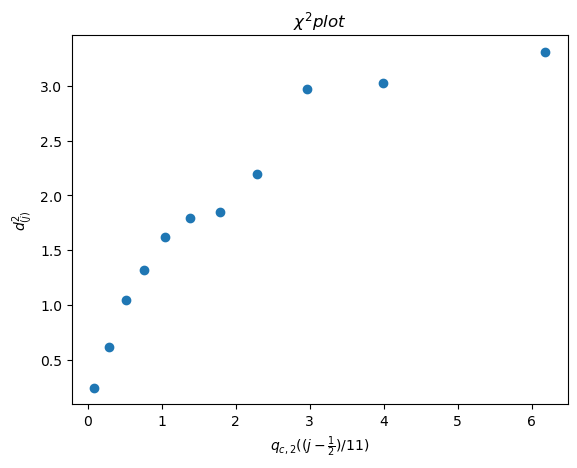

In [22]:
plt.scatter(chi2_data[:,1].flatten(), chi2_data[:,0].flatten())
plt.xlabel(fr'$q_{{c, {p} }}((j - \frac{{ 1 }}{{ 2 }})/{n})$')
plt.ylabel('$d_{(j)}^{2}$')
plt.title(fr'$\chi^{2} plot$')
plt.savefig(r'.\Question-6-4.png')
plt.show()